### Situacion Modelado 
Encontrar el mejor modelo para predecir el genero de las canciones, las cuales estan etiquetadas por pertenecer a una playlist de spotify con una categoria de musica dentro de los 121 generos que usa spotify. De estos 121 generos nos quedamos con 5 generos para predicr.
Utilizaremos parte de dataset (__train_test_split__)

Generos seleccionados:
- rock
- pop
- jazz
- hip-hop
- classical

In [15]:
#Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

#Metricas
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Descripcion de nuestro dataset

In [2]:
df = pd.read_csv('./datasets/tracks_by_genre.csv')

In [3]:
df.head()

,id,name,album_id,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,color
0,005lwxGU1tms6HGELIcUv9,I Kissed A Girl,0r2BUyPTmpbfuz4rR39mLl,pop,0.699,0.7600,5,-3.173,1,0.0677,...,0.1320,0.6960,129.996,audio_features,spotify:track:005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/tracks/005lwxGU1tms...,https://api.spotify.com/v1/audio-analysis/005l...,179640,4,[0.00196078 0.70928131 0.92328911 1. ]
1,007kRcQoBb4BN9GywpeJAa,Solo,0nZn0G4LOzU6G4ProRExYy,rock,0.612,0.9410,10,-6.153,0,0.0444,...,0.0973,0.7740,120.064,audio_features,spotify:track:007kRcQoBb4BN9GywpeJAa,https://api.spotify.com/v1/tracks/007kRcQoBb4B...,https://api.spotify.com/v1/audio-analysis/007k...,174048,4,[0.5 0. 1. 1. ]
2,00CXUMREit80f2McJsjcIz,"Lieder ohne Worte (Songs without Words), Book ...",4oPL5qL3uEurG2nu1MsVwT,classical,0.355,0.0164,3,-28.659,1,0.0396,...,0.0986,0.0922,67.946,audio_features,spotify:track:00CXUMREit80f2McJsjcIz,https://api.spotify.com/v1/tracks/00CXUMREit80...,https://api.spotify.com/v1/audio-analysis/00CX...,282813,4,[1.0000000e+00 1.2246468e-16 6.1232340e-17 1.0...
3,00MDdSPO6iWPZwwuF6RH89,Fluster,5zDXxceLBK4Ojz08uNZ2KB,jazz,0.504,0.1660,0,-14.374,1,0.0441,...,0.1080,0.2650,120.511,audio_features,spotify:track:00MDdSPO6iWPZwwuF6RH89,https://api.spotify.com/v1/tracks/00MDdSPO6iWP...,https://api.spotify.com/v1/audio-analysis/00MD...,211958,4,[0.50392157 0.99998103 0.70492555 1. ]
4,00TU7szqwBrxWTd9SO7ihK,Ella Uso Mi Cabeza Como Un Revolver - MTV Unpl...,5RJLKN7ucuVaRAUzNKtKB8,rock,0.396,0.7640,0,-7.348,0,0.0342,...,0.7080,0.2360,82.858,audio_features,spotify:track:00TU7szqwBrxWTd9SO7ihK,https://api.spotify.com/v1/tracks/00TU7szqwBrx...,https://api.spotify.com/v1/audio-analysis/00TU...,364493,4,[0.5 0. 1. 1. ]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2699 entries, 0 to 2698
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2699 non-null   object 
 1   name              2699 non-null   object 
 2   album_id          2699 non-null   object 
 3   genre             2699 non-null   object 
 4   danceability      2699 non-null   float64
 5   energy            2699 non-null   float64
 6   key               2699 non-null   int64  
 7   loudness          2699 non-null   float64
 8   mode              2699 non-null   int64  
 9   speechiness       2699 non-null   float64
 10  acousticness      2699 non-null   float64
 11  instrumentalness  2699 non-null   float64
 12  liveness          2699 non-null   float64
 13  valence           2699 non-null   float64
 14  tempo             2699 non-null   float64
 15  type              2699 non-null   object 
 16  uri               2699 non-null   object 


In [5]:
df.columns

Index(['id', 'name', 'album_id', 'genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature', 'color'],
      dtype='object')

In [6]:
df.shape

(2699, 22)

### Seleccion de features y target

In [7]:
included_types = ['float64', 'int64']
#Selecciono las columnas con tipo float e int junto con la columna genre
selected_columns = df.select_dtypes(include=included_types).join(df['genre']).columns
selected_variables = df[selected_columns]



In [8]:
selected_variables.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.699,0.7600,5,-3.173,1,0.0677,0.00223,0.000000,0.1320,0.6960,129.996,179640,4,pop
1,0.612,0.9410,10,-6.153,0,0.0444,0.02650,0.000335,0.0973,0.7740,120.064,174048,4,rock
2,0.355,0.0164,3,-28.659,1,0.0396,0.99500,0.926000,0.0986,0.0922,67.946,282813,4,classical
3,0.504,0.1660,0,-14.374,1,0.0441,0.98600,0.047300,0.1080,0.2650,120.511,211958,4,jazz
4,0.396,0.7640,0,-7.348,0,0.0342,0.00284,0.012800,0.7080,0.2360,82.858,364493,4,rock


## Busqueda de modelo multiclase
Teniendo en cuenta que nuestro dataset tiene alrededor de 2700 observaciones, iniciaremos el proceso de evaluacion de modelos con Linear SVC

### Linear SVC 

Primero hay que creat un dataset con labels numericas

In [11]:
#Linear SVC Model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#multi-label
from sklearn.preprocessing import label_binarize

#Binarizo la columna genre
y = label_binarize(selected_variables['genre'], classes=["rock", "pop", "jazz", "hip-hop","classical"])
n_classes = y.shape[1]

X = selected_variables.drop('genre', axis=1)

#Split datset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, #540
                                                    random_state=42)
#Modelo Linear SVC
model_LSVC = LinearSVC(penalty='l2',
                  loss = 'squared_hinge',
                  dual = True,#Prefer dual=False when n_samples > n_features.
                  tol = 0.0001, #Tolerance for stopping criteria.
                  multi_class='ovr',#"ovr" trains n_classes one-vs-rest classifiers
                  fit_intercept=True, #Whether to calculate the intercept for this model.
                  class_weight=None,#dict or balanced. If not given, all classes are supposed to have weight one
                  random_state=42) 



Usamos OneVsRestClassifier for multi-label prediction

In [12]:
from sklearn.multiclass import OneVsRestClassifier
classifier = OneVsRestClassifier(model_LSVC)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [16]:
classifier = OneVsRestClassifier(model_LSVC)
LSVC_scores = cross_val_score(
    classifier,
    X_train,
    y_train,
    cv=10,
    scoring="accuracy"
)

/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [17]:
print('LSVC Scores: ')
print(f'Mean: {LSVC_scores.mean():.6f} ({LSVC_scores.std():.6f})') #Ta bueno el resultado por suerte

LSVC Scores: 
Mean: 0.069444 (0.085692)


In [18]:
def f1_calc(precision: float, recall: float) -> float:
    return (2 * precision * recall) / (precision + recall)

In [20]:
y_lsvc_cross_val_pred = cross_val_predict(
    classifier,
    X_train,
    y_train,
    cv=10
)
lsvc_precision_score = precision_score(
    y_train,
    y_lsvc_cross_val_pred,
    average='micro'
)
lvsc_recall = recall_score(
    y_train,
    y_lsvc_cross_val_pred,
    average='micro'
)

/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/media/lucas/Windows/Documentos/Aa_UNSAM/2023_1_Cuatrimestre/IAA-F/TP Spotify/Grupo/IAA_tpfinal/venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [21]:
print('Logistic Regression')
print(f'Precision score: {lsvc_precision_score:.6f}')
print(f'Recall score: {lvsc_recall:.6f}')
print(f'F1 score: {f1_calc(lsvc_precision_score, lvsc_recall):.6f}')

Logistic Regression
Precision score: 0.199495
Recall score: 0.219546
F1 score: 0.209041


In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(
    y_test.ravel(), y_score.ravel()
)
average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

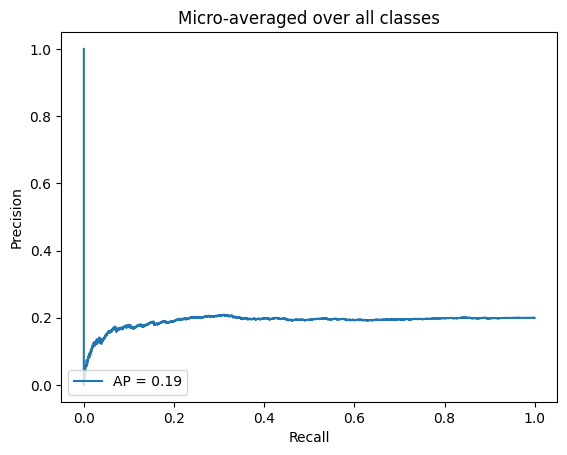

In [43]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

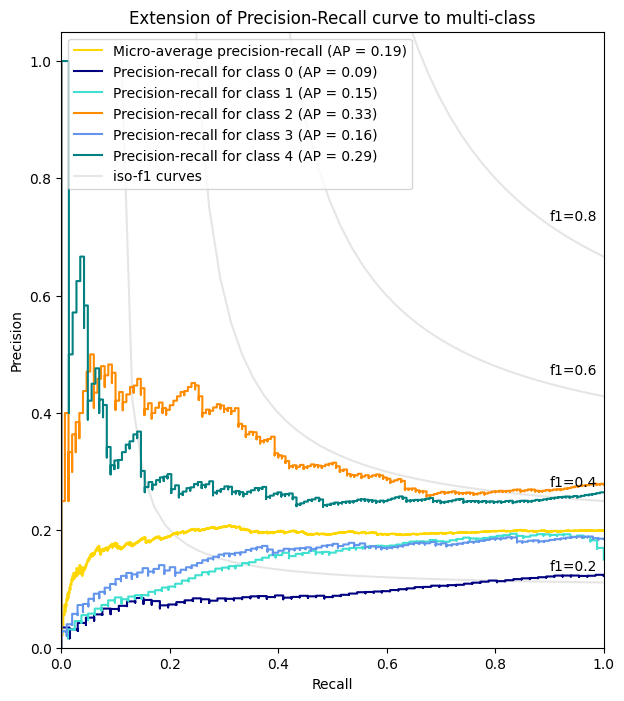

In [44]:
import matplotlib.pyplot as plt
from itertools import cycle

# setup plot details
colors = cycle(["navy", "turquoise", "darkorange", "cornflowerblue", "teal"])

_, ax = plt.subplots(figsize=(7, 8))

f_scores = np.linspace(0.2, 0.8, num=4)
lines, labels = [], []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    (l,) = plt.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    plt.annotate("f1={0:0.1f}".format(f_score), xy=(0.9, y[45] + 0.02))

display = PrecisionRecallDisplay(
    recall=recall["micro"],
    precision=precision["micro"],
    average_precision=average_precision["micro"],
)
display.plot(ax=ax, name="Micro-average precision-recall", color="gold")

for i, color in zip(range(n_classes), colors):
    display = PrecisionRecallDisplay(
        recall=recall[i],
        precision=precision[i],
        average_precision=average_precision[i],
    )
    display.plot(ax=ax, name=f"Precision-recall for class {i}", color=color)

# add the legend for the iso-f1 curves
handles, labels = display.ax_.get_legend_handles_labels()
handles.extend([l])
labels.extend(["iso-f1 curves"])
# set the legend and the axes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()